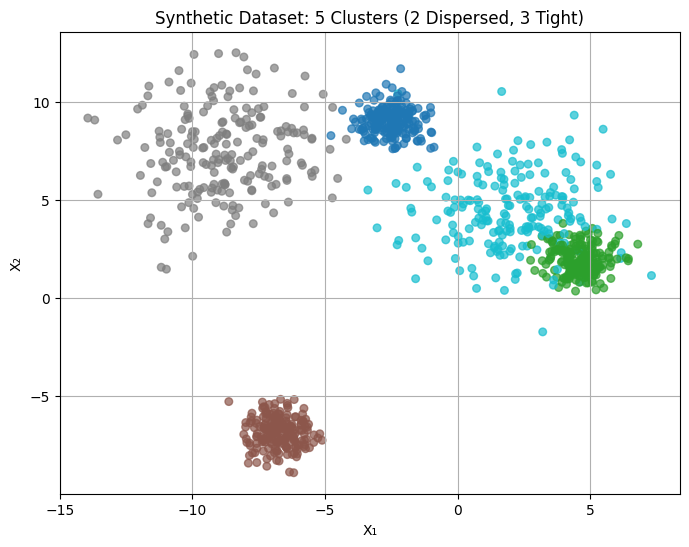

In [1]:
# Generate synthetic data (blobs) to test training a K-Means clustering model
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Total number of cluster centers to generate
n_clusters = 5

# Custom standard deviations for each cluster:
# - 3 clusters will be tight (std = 0.7)
# - 2 clusters will be more dispersed (std = 2)
# The order corresponds to the order of centers generated internally
cluster_std = [0.7, 0.7, 0.7, 2, 2]

# Generate synthetic 2D data
# - n_samples: total number of data points
# - centers: number of clusters (and cluster centers)
# - cluster_std: list of standard deviations for each cluster
# - random_state: ensures reproducibility of the data
X, y = make_blobs(n_samples=1000,
                  centers=n_clusters,
                  cluster_std=cluster_std,
                  random_state=42)

# Plot the generated data
plt.figure(figsize=(8, 6))

# Scatter plot:
# - X[:, 0] and X[:, 1]: first and second features (axes)
# - s=30: size of each point
# - alpha=0.7: transparency for better overlap visibility
# - c=y: color points by true cluster label
# - cmap="tab10": qualitative color map for better visual separation
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.7, c=y, cmap="tab10")

# Axis labels and title
plt.xlabel("X₁")
plt.ylabel("X₂")
plt.title("Synthetic Dataset: 5 Clusters (2 Dispersed, 3 Tight)")

# Optional: grid for visual reference
plt.grid(True)

# Display the plot
plt.show()

In [2]:
from sklearn.cluster import KMeans

# Define the number of clusters K-Means should find
k = 5

# Create a KMeans instance with k clusters
# By default:
# - init='k-means++' for smarter initialization
# - n_init=10 runs the algorithm 10 times and picks the best
# - max_iter=300 is the max number of iterations per run
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data and predict the cluster each point belongs to
y_pred = kmeans.fit_predict(X)

# Print predicted cluster labels for each data point
print(y_pred)

[3 3 0 3 1 0 4 1 3 1 1 0 4 0 4 0 2 4 2 3 3 2 4 0 2 3 2 4 1 4 3 4 1 4 2 0 1
 1 3 2 1 4 4 0 4 0 3 3 2 0 3 4 0 2 2 2 2 0 0 2 3 4 0 1 0 3 4 4 3 3 4 0 3 0
 4 2 4 3 3 4 2 3 0 0 4 3 2 1 2 4 3 4 3 1 1 0 2 2 0 4 0 1 3 0 2 3 2 0 1 2 2
 3 0 0 4 2 4 0 2 2 0 2 0 0 0 0 4 0 2 3 3 4 3 1 0 3 3 1 2 4 0 2 3 2 3 3 0 3
 3 1 2 0 3 3 2 3 3 2 4 3 2 3 4 2 4 3 1 4 2 3 0 2 2 0 1 0 4 0 3 3 3 2 3 4 1
 1 3 0 4 2 2 2 3 1 3 2 1 0 2 3 0 4 0 0 4 1 1 2 1 3 2 4 4 3 3 0 0 0 2 1 0 0
 2 0 2 1 0 1 3 3 2 3 2 3 3 4 2 2 4 3 1 4 0 1 0 0 0 0 4 1 0 0 1 3 1 2 4 3 3
 2 3 3 3 4 3 4 4 4 0 0 3 3 4 3 2 1 0 2 4 1 1 0 3 3 0 4 3 3 3 2 3 2 4 1 3 4
 1 1 2 3 4 4 2 1 3 4 4 2 0 4 4 0 1 1 3 4 0 0 3 0 3 2 0 1 4 0 1 0 4 2 2 4 2
 2 3 1 4 4 4 2 4 3 3 4 1 1 0 0 2 3 0 4 2 2 2 2 2 3 2 3 1 3 3 1 3 0 0 3 4 0
 0 4 0 0 0 3 3 0 2 3 2 1 3 2 4 4 1 0 0 3 2 2 4 4 0 2 4 2 1 0 1 3 3 3 2 2 2
 0 3 0 0 2 2 4 0 2 1 0 1 2 2 2 1 3 2 3 2 3 2 2 4 4 3 4 2 2 4 0 2 0 4 4 0 2
 2 0 0 1 0 2 3 0 3 1 1 1 0 3 3 3 1 2 4 2 3 2 3 3 2 3 0 0 0 1 2 2 1 3 3 1 3
 4 0 3 0 2 4 0 1 1 3 2 3 

d:\hands_on_machine_learning\C9 - Unsupervised Learning Techniques\env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\hands_on_machine_learning\C9 - Unsupervised Learning Techniques\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kf

In [3]:
# Checks if y_pred and kmeans.labels_ refer to the exact same object in memory (identity comparison, not just equality)
y_pred is kmeans.labels_

True

In [4]:
# Returns the coordinates of the cluster centroids found by the K-Means algorithm (shape: [n_clusters, n_features])
kmeans.cluster_centers_  

array([[-6.74430299, -6.83200906],
       [ 1.69215388,  4.73196363],
       [-2.67456383,  8.95428703],
       [ 4.49110038,  2.05154001],
       [-9.07452517,  7.40577642]])

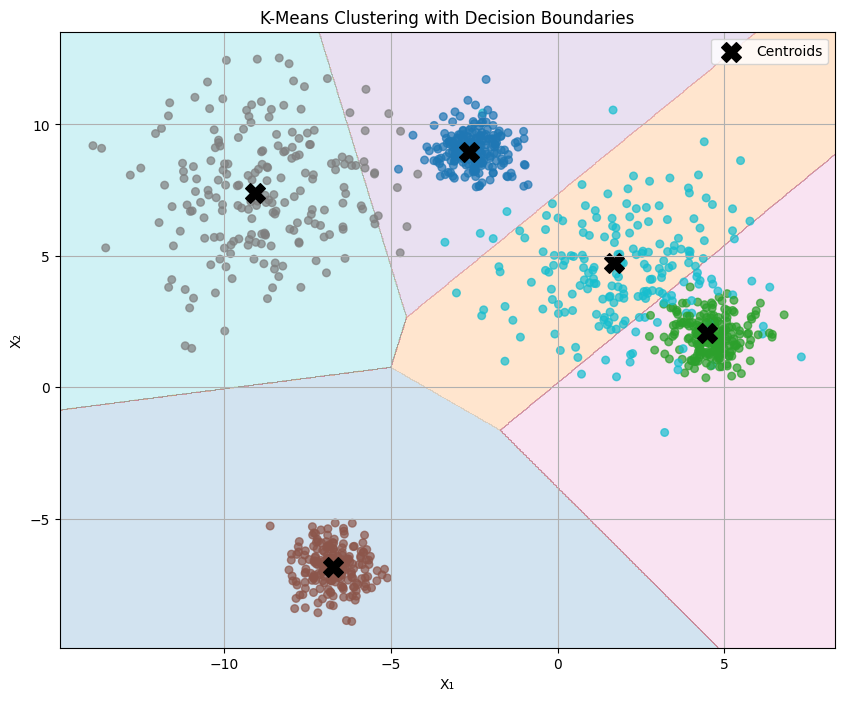

In [5]:
import numpy as np

# Create a mesh grid over the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                     np.linspace(y_min, y_max, 1000))

# Predict cluster labels for each point in the grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z = kmeans.predict(grid)
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.2, cmap="tab10")  # Decision regions

# Plot the clustered data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="tab10", alpha=0.7)

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', s=200, marker='X', label='Centroids')

plt.xlabel("X₁")
plt.ylabel("X₂")
plt.title("K-Means Clustering with Decision Boundaries")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# As we can see, the algorith is assigning each instance to the closest centroid
# which causes several intances to be mislabeled
# Instead of assigning each instance to a single cluster, which is called Hard Clustering
# it can useful to give each instance a score per cluster, which is called Soft Clustering
# The transform method will provide the distance that each instance have to every centroid
kmeans.transform(X)

array([[14.86508187,  3.97042432, 10.0207929 ,  0.54220364, 14.84949706],
       [13.2806963 ,  3.84224409,  9.83326326,  1.04289525, 14.06259648],
       [ 2.08182799, 15.79971992, 18.20116234, 15.3840808 , 16.50802027],
       ...,
       [14.17421957, 11.95695262,  7.65012501, 15.35083939,  1.08354224],
       [15.16375085,  3.29444406,  9.27948582,  1.16782261, 14.31765796],
       [15.34065455,  9.2851053 ,  4.13970301, 12.99850467,  2.53659178]],
      shape=(1000, 5))

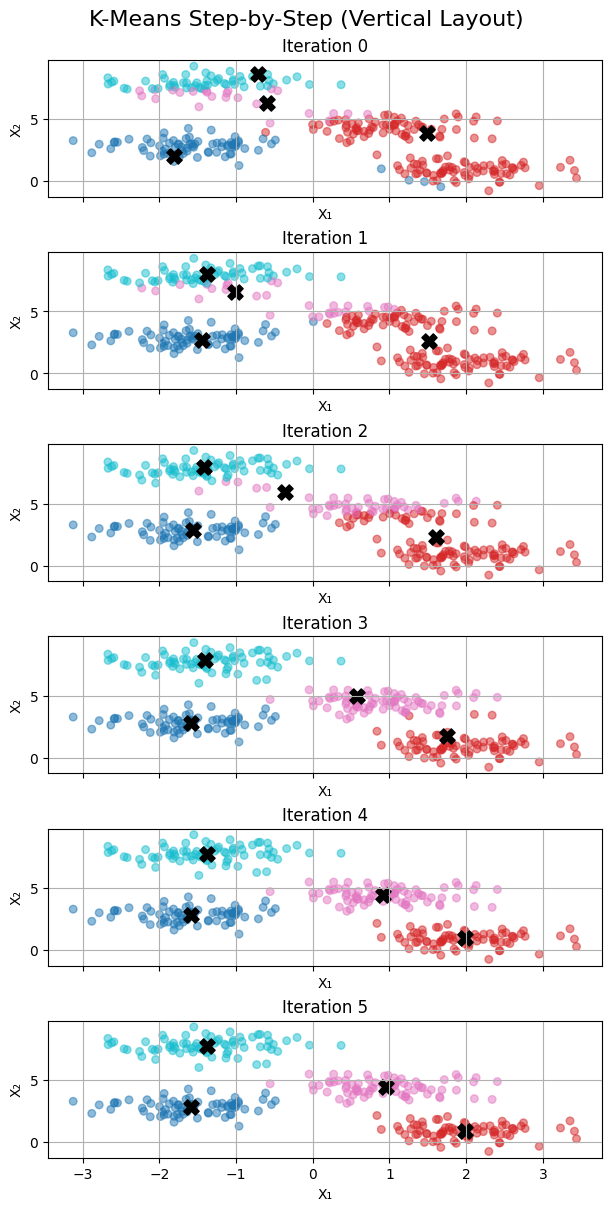

In [7]:
# Generate synthetic data
X_new, y_new = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Number of clusters
k = 4

# Initialize centroids randomly from the dataset
np.random.seed(42)
random_indices = np.random.permutation(len(X_new))[:k]
centroids = X_new[random_indices]

# Helper functions
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X_new[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

# Set up the subplot grid: vertical layout, rectangular shape
max_iter = 6
fig, axes = plt.subplots(max_iter, 1, figsize=(6, 12), sharex=True, sharey=True, constrained_layout=True)

# Run K-Means manually and plot each step
for step in range(max_iter):
    ax = axes[step]

    # Assign clusters and plot points
    labels = assign_clusters(X_new, centroids)
    ax.scatter(X_new[:, 0], X_new[:, 1], c=labels, cmap="tab10", s=30, alpha=0.5)

    # Plot centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=120, marker='X', label='Centroids')
    ax.set_title(f"Iteration {step}")
    ax.set_xlabel("X₁")
    ax.set_ylabel("X₂")
    ax.grid(True)

    # Update centroids for next step
    new_centroids = update_centroids(X_new, labels, k)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

plt.suptitle("K-Means Step-by-Step (Vertical Layout)", fontsize=16)
plt.show()


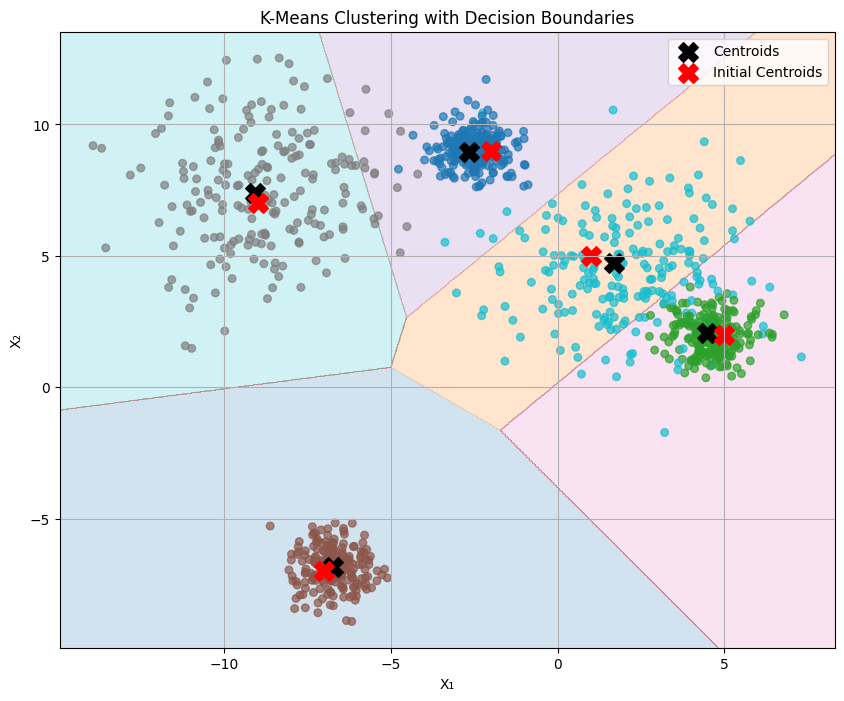

In [8]:
# In some ocations, KMeans may not converge to the correcto solution,
# which means that the centroid are not placed at the center of the blob
# To avoid this issues, you can include initial coordiantes, so KMeans starts looking for the solution near the correcto posicion

# Manually define a good initial set of centroids (chosen close to actual cluster centers)
good_init = np.array([[-7, -7], [1, 5], [-2, 9], [5, 2], [-9, 7]])
k = 5

# Initialize KMeans with the custom centroids
# - n_init=1 ensures the algorithm only uses our provided initialization
kmeans_with_init = KMeans(n_clusters=k, init=good_init, n_init=1)

# Fit the model to the data and predict cluster labels for each data point
y_pred_with_init = kmeans_with_init.fit_predict(X)

# Define a fine grid that covers the feature space (for decision boundary visualization)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 1000),
    np.linspace(y_min, y_max, 1000)
)

# Predict the cluster index for each point in the mesh grid
grid = np.c_[xx.ravel(), yy.ravel()]  # Flatten grid into list of coordinates
Z = kmeans_with_init.predict(grid)
Z = Z.reshape(xx.shape)  # Reshape to match mesh grid shape


plt.figure(figsize=(10, 8))

# Plot decision boundaries using the predicted labels over the grid
plt.contourf(xx, yy, Z, alpha=0.2, cmap="tab10")

# Plot the actual clustered data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="tab10", alpha=0.7)

# Plot the final cluster centers found by KMeans
plt.scatter(kmeans_with_init.cluster_centers_[:, 0],
            kmeans_with_init.cluster_centers_[:, 1],
            c='black', s=200, marker='X', label='Centroids')

# Highlight the initial centroids used for initialization
plt.scatter(good_init[:, 0], good_init[:, 1],
            c='red', s=200, marker='X', label='Initial Centroids')

# Labeling and final touches
plt.xlabel("X₁")
plt.ylabel("X₂")
plt.title("K-Means Clustering with Decision Boundaries")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# K-Means runs 10 random initialization centroids by default, and keeps the best one
# which is determine by the inertia metric
# Here is a comparison between the two models trained

print(f"This is the inertia metric for the first K-Means model:{kmeans.inertia_:.2F}")
print(f"This is the inertia metric for the second K-Means model:{kmeans_with_init.inertia_:.2F}")

This is the inertia metric for the first K-Means model:3227.15
This is the inertia metric for the second K-Means model:3227.15


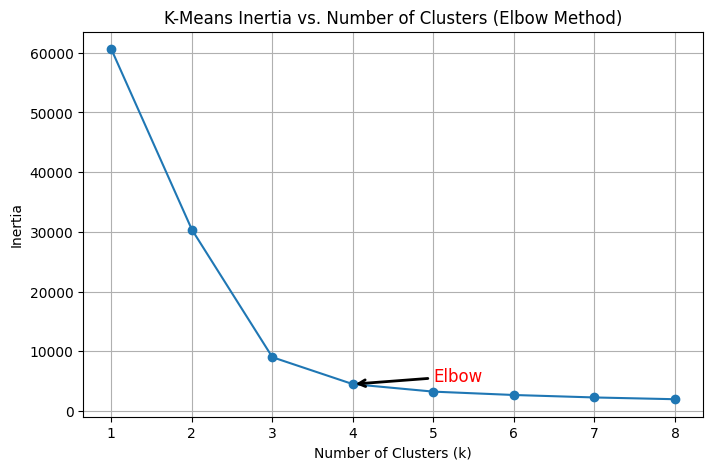

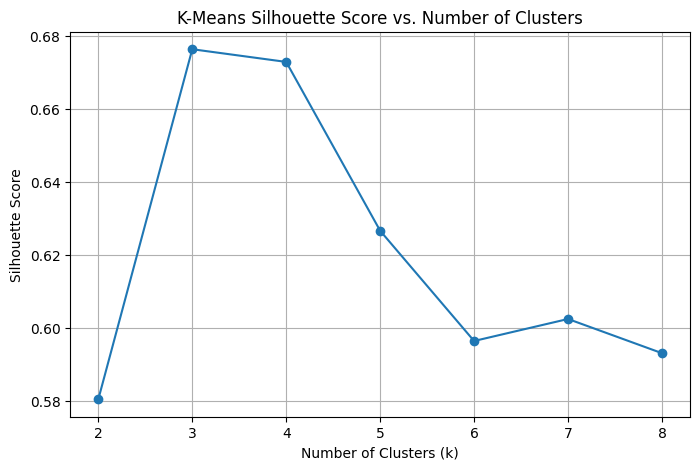

In [10]:
from sklearn.metrics import silhouette_score

# Lists to store evaluation metrics
inertias = []
silhouettes = []

# Range of cluster counts to test (from 1 to 8)
k_values = range(1, 9)

# Train one KMeans model per value of k and store the inertia
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)  # Fit model to the data
    inertias.append(model.inertia_)  # Store the sum of squared distances (inertia)

    if k>=2 :
        score = silhouette_score(X, model.labels_) # Calculates silhouetes score
        silhouettes.append(score) # Store's the silhouette value
    else:
        silhouettes.append(np.nan) # Placeholder for k=1
        
# Plot the inertia vs number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("K-Means Inertia vs. Number of Clusters (Elbow Method)")
plt.grid(True)

# Add annotation to highlight the elbow point at k=4
plt.annotate("Elbow",
             xy=(4, inertias[3]),                # Point to annotate (index 3 corresponds to k=4)
             xytext=(5, inertias[3] + 500),      # Position of the text
             arrowprops=dict(arrowstyle="->", lw=2),
             fontsize=12,
             color='red')

plt.show()

# Plot the silhouette scores of each model
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouettes, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("K-Means Silhouette Score vs. Number of Clusters")
plt.grid(True)

plt.show()


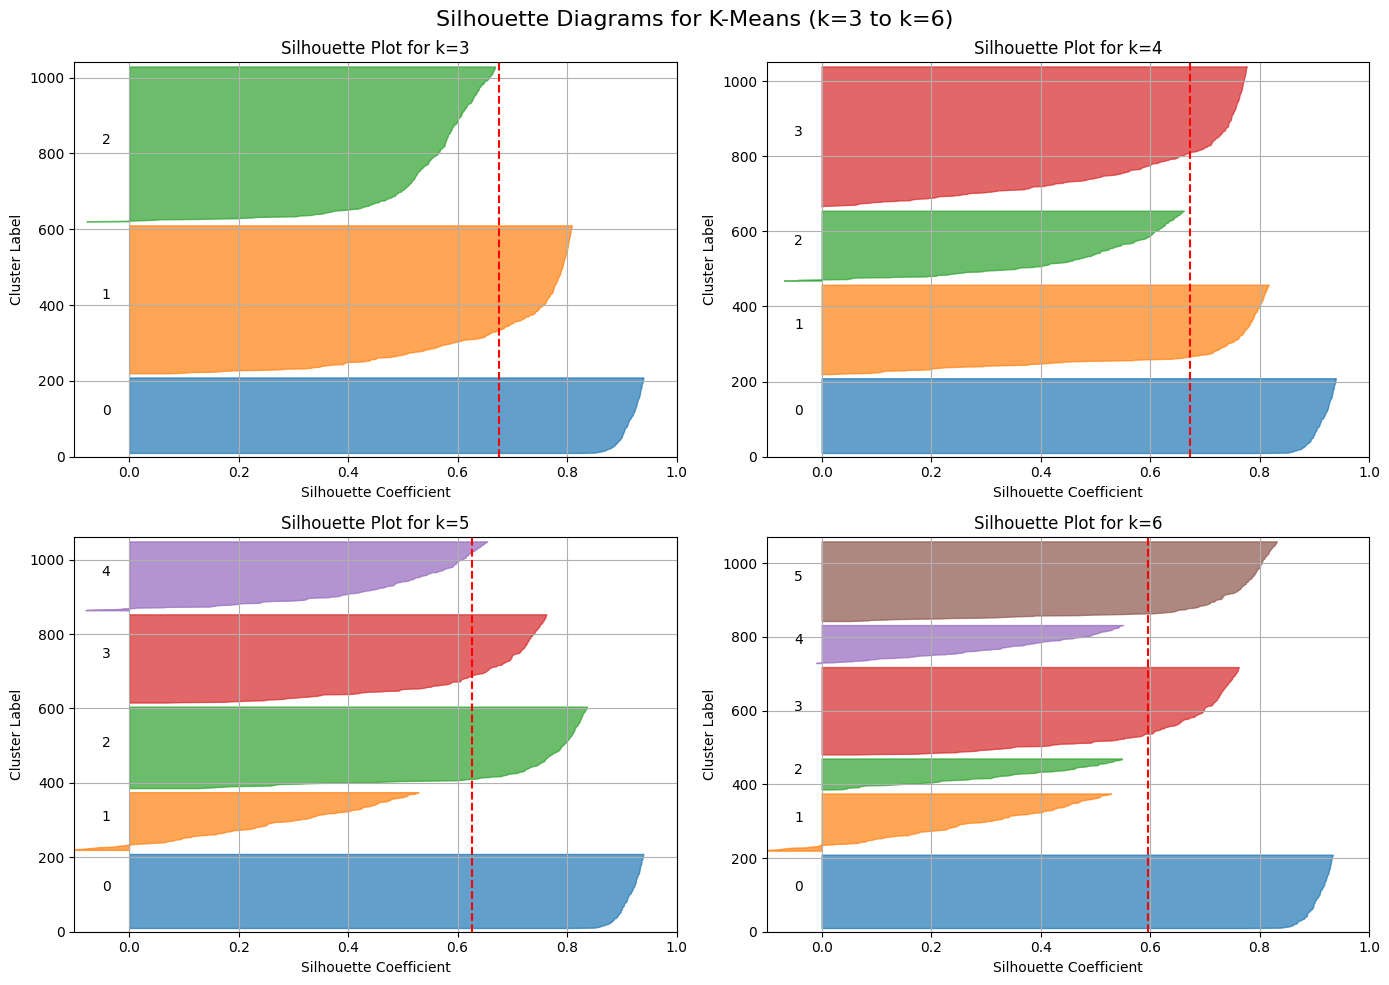

In [12]:
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm

# Range of cluster counts to evaluate
k_range = range(3, 7)

# Create a 2x2 grid of subplots (one for each k)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten to access with a simple index

# Iterate over each value of k (number of clusters)
for idx, k in enumerate(k_range):
    ax = axes[idx]  # Select the subplot for this k

    # Fit KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Compute silhouette values for each point
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Compute average silhouette score (used for vertical reference line)
    avg_silhouette = silhouette_score(X, cluster_labels)

    # Track where to start drawing each cluster’s silhouette
    y_lower = 10

    # Plot silhouette bars for each cluster
    for i in range(k):
        # Get and sort silhouette scores for cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        # Determine the vertical range for this cluster's bar
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Pick a color and draw the silhouette bar
        color = cm.tab10(i)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        # Label the cluster number on the y-axis
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Move to the next vertical position
        y_lower = y_upper + 10  # Add space between clusters

    # Draw vertical line for average silhouette score
    ax.axvline(x=avg_silhouette, color="red", linestyle="--")

    # Configure the subplot
    ax.set_title(f"Silhouette Plot for k={k}")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (k + 1) * 10])
    ax.grid(True)

# Main title for the entire figure
plt.suptitle("Silhouette Diagrams for K-Means (k=3 to k=6)", fontsize=16)
plt.tight_layout()
plt.show()

